**How to extract feature matrix from the DNA sequence**

Parsing DNA sequence data (fasta): Bio.SeqIO from Biopython: a simple uniform interface to input and output assorted sequence file formats.

In [ ]:
pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.1 MB 7.7 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from Bio import SeqIO
from IPython.display import Image

In [ ]:
for sequence in SeqIO.parse('/content/drive/MyDrive/DATA/Project/Dương Bảo Châu/example_dna.fa', "fasta"):
    print(sequence.id)
    print(sequence.seq)
    print(len(sequence))

ENST00000435737.5
ATGTTTCGCATCACCAACATTGAGTTTCTTCCCGAATACCGACAAAAGGAGTCCAGGGAATTTCTTTCAGTGTCACGGACTGTGCAGCAAGTGATAAACCTGGTTTATACAACATCTGCCTTCTCCAAATTTTATGAGCAGTCTGTTGTTGCAGATGTCAGCAACAACAAAGGCGGCCTCCTTGTCCACTTTTGGATTGTTTTTGTCATGCCACGTGCCAAAGGCCACATCTTCTGTGAAGACTGTGTTGCCGCCATCTTGAAGGACTCCATCCAGACAAGCATCATAAACCGGACCTCTGTGGGGAGCTTGCAGGGACTGGCTGTGGACATGGACTCTGTGGTACTAAATGAAGTCCTGGGGCTGACTCTCATTGTCTGGATTGACTGA
390
ENST00000419127.5
ATGTTTCGCATCACCAACATTGAGTTTCTTCCCGAATACCGACAAAAGGAGTCCAGGGAATTTCTTTCAGTGTCACGGACTGTGCAGCAAGTGATAAACCTGGTTTATACAACATCTGCCTTCTCCAAATTTTATGAGCAGTCTGTTGTTGCAGATGTCAGCAACAACAAAGGCGGCCTCCTTGTCCACTTTTGGATTGTTTTTGTCATGCCACGTGCCAAAGGCCACATCTTCTGTGAAGACTGTGTTGCCGCCATCTTGAAGGACTCCATCCAGACAAGCATCATAAACCGGACCTCTGTGGGGAGCTTGCAGGGACTGGCTGTGGACATGGACTCTGTGGTACTAAATGACAAAGGCTGCTCTCAGTACTTCTATGCAGAGCATCTGTCTCTCCACTACCCGCTGGAGATTTCTGCAGCCTCAGGGAGGCTGATGTGTCACTTCAAGCTGGTGGCCATAGTGGGCTACCTGATTCGTCTCTCAATCAAGTCCATCCAAATCGAAGCCGACAACTGTGTCACTGACTCCCTGACCATTTACGACTCCCTTTTGCCCATCCGGAGCAG

Encoding these characters into matrices: 

In [ ]:
# ordinal encoding DNA sequence data
# creating a NumPy array object from a sequence string, 
# and a label encoder with the DNA sequence alphabet “a”, “c”, “g” and “t”, 
# but also a character for anything else, “n”.
import numpy as np
import re
def string_to_array(seq_string):
  seq_string = seq_string.lower()
  seq_string = re.sub('[^acgt]','n', seq_string)
  seq_string = np.array(list(seq_string))
  return seq_string
# create a label encoder with 'acgtn' alphabet
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(np.array(['a','c','g','t','n']))


LabelEncoder()

In [ ]:
def ordinal_encoder(my_array):
  integer_encoded = label_encoder.transform(my_array)
  float_encoded = integer_encoded.astype(float)
  float_encoded[float_encoded == 0] = 0.25 #A
  float_encoded[float_encoded == 1] = 0.50 # C
  float_encoded[float_encoded == 2] = 0.75 # G
  float_encoded[float_encoded == 3] = 1.00 # T
  float_encoded[float_encoded == 4] = 0.00 # anything else, lets say n
  return float_encoded

In [ ]:
# one-hot encoding DNA Sequence
from sklearn.preprocessing import OneHotEncoder
def one_hot_encoder(seq_string):
  int_encoded = label_encoder.transform(seq_string)
  onehot_encoder = OneHotEncoder(sparse=False, dtype=int)
  int_encoded = int_encoded.reshape(len(int_encoded),  1)
  onehot_encoded = onehot_encoder.fit_transform(int_encoded)
  onehot_encoded = np.delete(onehot_encoded, -1, 1)
  return onehot_encoded

In [ ]:
seq_test = 'GAATTCTCGAA'
one_hot_encoder(string_to_array(seq_test))

array([[0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

In [ ]:
# k-mer counting 
def Kmers_funct(seq, size):
  return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]


In [ ]:
# k-mer counting example 
mySeq = 'GTGCCCAGGTTCAGTGAGTGACACAGGCAG'
Kmers_funct(mySeq, size=7)
words = Kmers_funct(mySeq, size=6)
joined_sentence = ' '.join(words)
mySeq1 = 'TCTCACACATGTGCCAATCACTGTCACCC'
mySeq2 = 'GTGCCCAGGTTCAGTGAGTGACACAGGCAG'
sentence1 = ' '.join(Kmers_funct(mySeq1, size=6))
sentence2 = ' '.join(Kmers_funct(mySeq2, size=6))
#Creating the Bag of Words model:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform([joined_sentence, sentence1, sentence2]).toarray()
X

array([[0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 1],
       [1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
        1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 1]])

**Objective**: Build a classification model that is trained on the human DNA sequence and can predict a gene family based on the DNA sequence of the coding sequence. To test the model, we will use the DNA sequence of humans, dogs, and chimpanzees and compare the accuracies.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
%cd '/content/drive/MyDrive/DATA/Project/Dương Bảo Châu'
!ls

/content/drive/.shortcut-targets-by-id/1Qv2QzLU7VGZ3Qb-SEJJAG7ktLXBLxmwg/DATA/Project/Dương Bảo Châu
chimpanzee.txt	dog.txt		Final-project-pythonK25.pptx  human.txt
DNA-seq.ipynb	example_dna.fa	gene_class.png


In [ ]:
# load human DNA data
human_dna = pd.read_table('human.txt')
human_dna.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


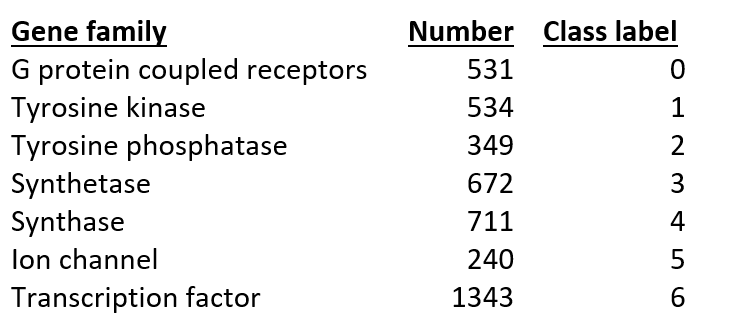

In [ ]:
Image('/content/drive/MyDrive/DATA/Project/Dương Bảo Châu/gene_class.png')

Text(0.5, 1.0, 'Class distribution of Human DNA')

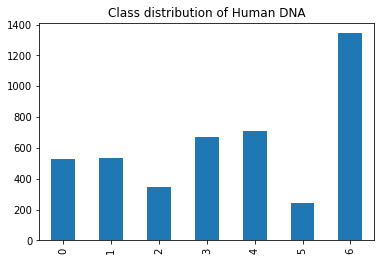

In [ ]:
human_dna['class'].value_counts().sort_index().plot.bar()
plt.title('Class distribution of Human DNA')

In [44]:
import plotly.express as ex
import plotly.graph_objs as google
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
import seaborn as sns 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



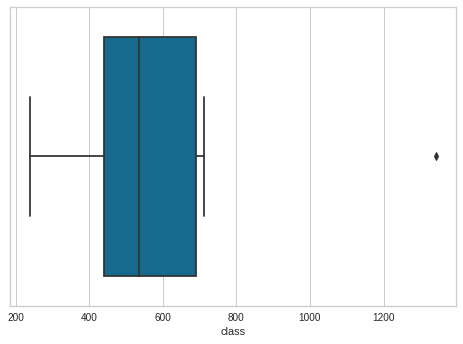

In [47]:
sns.boxplot(human_dna['class'].value_counts())

In [ ]:
ex.pie(human_dna, names='class', title='Proportion of Human Class', hole=0.33)

In [ ]:
# load Chimpanzee DNA data
chimp_dna = pd.read_table('chimpanzee.txt')
chimp_dna.head()

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


Text(0.5, 1.0, 'Class distribution of Chimpanzee DNA')

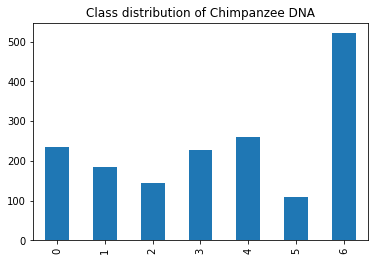

In [ ]:
chimp_dna['class'].value_counts().sort_index().plot.bar()
plt.title('Class distribution of Chimpanzee DNA')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



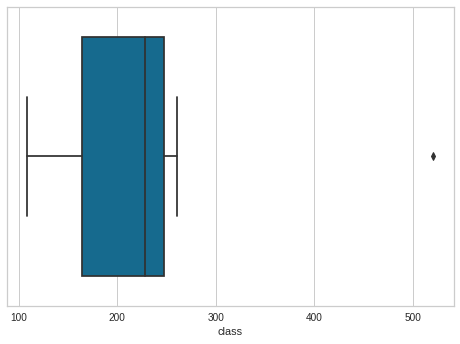

In [48]:
sns.boxplot(chimp_dna['class'].value_counts())

In [ ]:
ex.pie(chimp_dna, names='class', title='Proportion of Chimpanzee Classes', hole=0.33)

In [ ]:
# load Dog DNA data
dog_dna = pd.read_table('dog.txt')
dog_dna.head()

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0


Text(0.5, 1.0, 'Class distribution of Dog DNA')

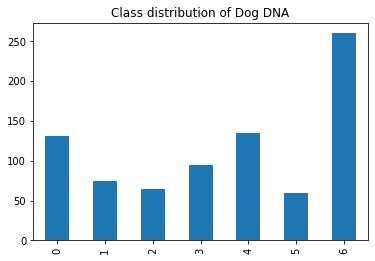

In [ ]:
dog_dna['class'].value_counts().sort_index().plot.bar()
plt.title("Class distribution of Dog DNA")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



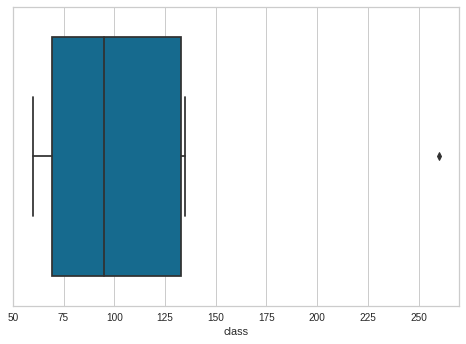

In [51]:
sns.boxplot(dog_dna['class'].value_counts())

In [ ]:
ex.pie(dog_dna, names='class', title='Proportion of Dog Classes', hole=0.33)

In [ ]:
#convert our training data sequences into short overlapping k-mers of length 6. 
human_dna['words'] = human_dna.apply(lambda x: Kmers_funct(x['sequence'], size = 6), axis=1)
human_dna = human_dna.drop('sequence', axis=1)

In [ ]:
human_dna.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [ ]:
human_texts = list(human_dna['words'])
for item in range(len(human_texts)):
  human_texts[item] = ' '.join(human_texts[item])
# separate labels
y_human = human_dna.iloc[:, 0].values #y_human for human_dna
y_human

array([4, 4, 3, ..., 6, 6, 6])

In [ ]:
chimp_dna['words'] = chimp_dna.apply(lambda x: Kmers_funct(x['sequence'], size = 6), axis=1)
chimp_dna = chimp_dna.drop('sequence', axis=1)

dog_dna['words'] = dog_dna.apply(lambda x: Kmers_funct(x['sequence'], size = 6), axis=1)
dog_dna = dog_dna.drop('sequence', axis=1)


In [ ]:
chimp_texts = list(chimp_dna['words'])
for item in range(len(chimp_texts)):
  chimp_texts[item] = ' '.join(chimp_texts[item])
y_chimp = chimp_dna.iloc[:, 0].values

In [ ]:
dog_texts = list(dog_dna['words'])
for item in range(len(dog_texts)):
  dog_texts[item] = ' '.join(dog_texts[item])
y_dog = dog_dna.iloc[:, 0].values

In [ ]:
y_human

array([4, 4, 3, ..., 6, 6, 6])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorize = CountVectorizer(ngram_range = (4,4))
X_human = count_vectorize.fit_transform(human_texts)

In [ ]:
print(X_human.shape)

(4380, 232414)


In [ ]:
X_chimp = count_vectorize.transform(chimp_texts)
X_dog = count_vectorize.transform(dog_texts)
print(X_chimp.shape)
print(X_dog.shape)

(1682, 232414)
(820, 232414)


So, for human we have 4380 genes converted into uniform length feature vectors of 4-gram k-mer (length 6) count. For chimp and dog, we have the same number of features with 1682 and 820 genes respectively.

In [ ]:
# splitting the human dataset into the trainingg set and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_human, y_human, test_size = 0.20, random_state = 42)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier

**Support Vector Classification**

In [ ]:
svm_clf = svm.SVC(kernel='rbf', C=1, random_state=0)
svm_clf.fit(X_train, y_train)
predicted = svm_clf.predict(X_test)
score = svm_clf.score(X_test, y_test)
svm_score_ = np.mean(score)

print('Accuracy: %.3f' % (svm_score_))

Accuracy: 0.806


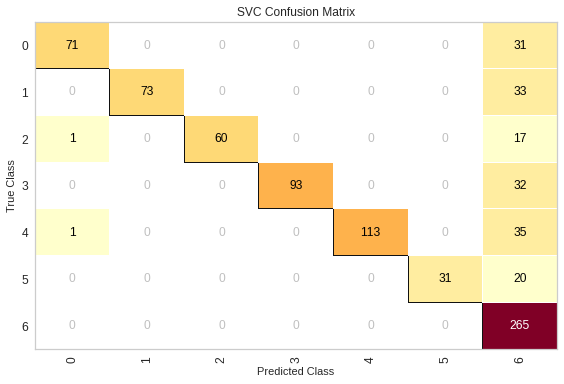

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.style import set_palette

svm_cm = ConfusionMatrix(svm_clf, classes=['0','1','2','3','4','5','6'])

svm_cm.fit(X_train, y_train)
svm_cm.score(X_test, y_test)
svm_cm.show()

In [ ]:
# creating a multinomial naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha = 0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
# checking some model performance metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('Confusion matrix for predictions on human test DNA sequence\n')
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))

def get_metrics(y_test, y_predicted):
  accuracy = accuracy_score(y_test, y_predicted)
  precision = precision_score(y_test, y_predicted, average = 'weighted')
  recall = recall_score(y_test, y_predicted, average='weighted')
  f1 = f1_score(y_test, y_predicted, average='weighted')
  return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print('accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f' % (accuracy, precision, recall, f1))

Confusion matrix for predictions on human test DNA sequence

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           1    0   0    0  143   0    5
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263
accuracy = 0.984 
precision = 0.984 
recall = 0.984 
f1 = 0.984


In [ ]:
# predicting the chimp, dog sequence
y_pred_chimp = classifier.predict(X_chimp)
y_pred_dog = classifier.predict(X_dog)

In [ ]:
# performance on chimpanzee genes
print('Confusion matrix for predictions on Chimpanzee test DNA sequence\n')
print(pd.crosstab(pd.Series(y_chimp, name='Actual'), pd.Series(y_pred_chimp, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_chimp, y_pred_chimp)
print('accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f' % (accuracy, precision, recall, f1))

Confusion matrix for predictions on Chimpanzee test DNA sequence

Predicted    0    1    2    3    4    5    6
Actual                                      
0          232    0    0    0    0    0    2
1            0  184    0    0    0    0    1
2            0    0  144    0    0    0    0
3            0    0    0  227    0    0    1
4            2    0    0    0  254    0    5
5            0    0    0    0    0  109    0
6            0    0    0    0    0    0  521
accuracy = 0.993 
precision = 0.994 
recall = 0.993 
f1 = 0.993


In [ ]:
# performance on dog genes
print('Confusion matrix for predictions on Dog test DNA sequence\n')
print(pd.crosstab(pd.Series(y_dog, name='Actual'), pd.Series(y_pred_dog, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_dog, y_pred_dog)
print('accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f' % (accuracy, precision, recall, f1))

Confusion matrix for predictions on Dog test DNA sequence

Predicted    0   1   2   3    4   5    6
Actual                                  
0          127   0   0   0    0   0    4
1            0  63   0   0    1   0   11
2            0   0  49   0    1   0   14
3            1   0   0  81    2   0   11
4            4   0   0   1  126   0    4
5            4   0   0   0    1  53    2
6            0   0   0   0    0   0  260
accuracy = 0.926 
precision = 0.934 
recall = 0.926 
f1 = 0.925
